## Level 1 Task 1 

#importing the Libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Loading the Dataset

In [6]:
data = pd.read_csv('Dataset.csv')

In [10]:
rows, columns = data.shape
print(f"no. of rows: {rows} \nno. of columns: {columns}")

no. of rows: 9551 
no. of columns: 21


In [12]:
missing_val = data.isnull().sum

#Scikit-learn
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
#Numeric missing
x = data.select_dtypes(include=[np.number]).columns
print(x)
data[x] = imputer.fit_transform(data[x])

#Categorical missing
cat_x = data.select_dtypes(include=['object']).columns
print(cat_x)
imputer_cat = SimpleImputer(strategy='most_frequent')
data[cat_x] = imputer_cat.fit_transform(data[cat_x])
print(data.isnull().sum())

Index(['Restaurant ID', 'Country Code', 'Longitude', 'Latitude',
       'Average Cost for two', 'Price range', 'Aggregate rating', 'Votes'],
      dtype='object')
Index(['Restaurant Name', 'City', 'Address', 'Locality', 'Locality Verbose',
       'Cuisines', 'Currency', 'Has Table booking', 'Has Online delivery',
       'Is delivering now', 'Switch to order menu', 'Rating color',
       'Rating text'],
      dtype='object')
Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


In [14]:
print(data.dtypes)
data[['Restaurant ID', 'Country Code', 'Average Cost for two', 'Price range', 'Votes']] = \
    data[['Restaurant ID', 'Country Code', 'Average Cost for two', 'Price range', 'Votes']].astype(int)
print(data.dtypes)

Restaurant ID           float64
Restaurant Name          object
Country Code            float64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two    float64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range             float64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                   float64
dtype: object
Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 o

count    9551.000000
mean        2.666370
std         1.516378
min         0.000000
25%         2.500000
50%         3.200000
75%         3.700000
max         4.900000
Name: Aggregate rating, dtype: float64


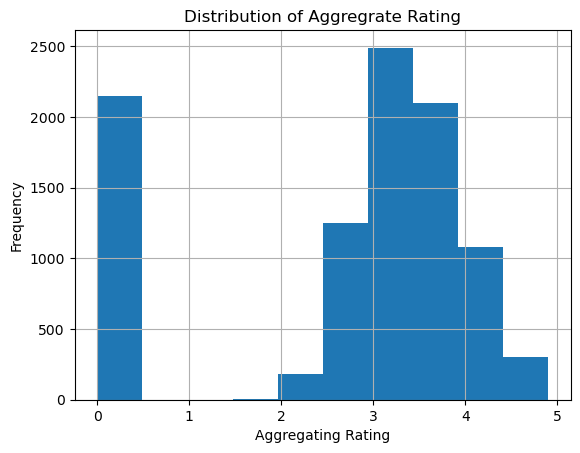

Aggregate rating
0.0    2148
3.2     522
3.1     519
3.4     498
3.3     483
3.5     480
3.0     468
3.6     458
3.7     427
3.8     400
2.9     381
3.9     335
2.8     315
4.1     274
4.0     266
2.7     250
4.2     221
2.6     191
4.3     174
4.4     144
2.5     110
4.5      95
2.4      87
4.6      78
4.9      61
2.3      47
4.7      42
2.2      27
4.8      25
2.1      15
2.0       7
1.9       2
1.8       1
Name: count, dtype: int64


In [16]:
target_var = 'Aggregate rating'
if target_var in data.columns:
    print(data[target_var].describe())
    data[target_var].hist(bins=10)
    plt.title("Distribution of Aggregrate Rating")
    plt.xlabel("Aggregating Rating")
    plt.ylabel("Frequency")
    plt.show()
    print(data[target_var].value_counts())
else:
    print("Target column not found in data")
# class imbalance is 0.0 rating has count 2148 

In [18]:
data.to_csv('task1_level1.csv',index=False)

## Level 1 Task 2

In [20]:
num_col = data.select_dtypes(include=['number']).columns
print('Statistic for numerical columns:\n',data[num_col].describe())

Statistic for numerical columns:
        Restaurant ID  Country Code    Longitude     Latitude  \
count   9.551000e+03   9551.000000  9551.000000  9551.000000   
mean    9.051128e+06     18.365616    64.126574    25.854381   
std     8.791521e+06     56.750546    41.467058    11.007935   
min     5.300000e+01      1.000000  -157.948486   -41.330428   
25%     3.019625e+05      1.000000    77.081343    28.478713   
50%     6.004089e+06      1.000000    77.191964    28.570469   
75%     1.835229e+07      1.000000    77.282006    28.642758   
max     1.850065e+07    216.000000   174.832089    55.976980   

       Average Cost for two  Price range  Aggregate rating         Votes  
count           9551.000000  9551.000000       9551.000000   9551.000000  
mean            1199.210763     1.804837          2.666370    156.909748  
std            16121.183073     0.905609          1.516378    430.169145  
min                0.000000     1.000000          0.000000      0.000000  
25%           